In [ ]:
_=!git clone https://github.com/Sht97/Accelerometer-Gyro-dataset.git dataset
!cd dataset && git pull

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import tensorflow as tf
from scikitplot.metrics import plot_confusion_matrix#Esta librería toca instalarla "conda install -c conda-forge scikit-plot"
from sklearn.model_selection import train_test_split

In [4]:
df1=pd.read_csv('dataset/Daniel/Activacion.csv')
df1.head()

,Tiempo,Contador,Acx,Acy,Acz,Gx,Gy,Gz
0,13092,12757,41,-881,-3970,98,-226.0,70.0
1,13108,12758,64,-866,-4013,108,-208.0,60.0
2,13124,12759,48,-910,-3990,149,-237.0,66.0
3,13140,12760,59,-869,-3988,130,-221.0,43.0
4,13156,12761,22,-892,-4052,86,-197.0,40.0


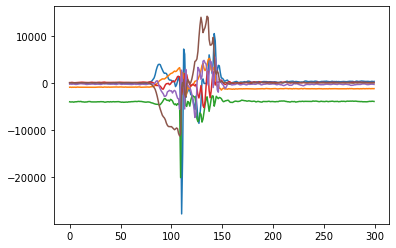

In [16]:
#Activacion(0) 
df=pd.read_csv('dataset/Daniel/Activacion.csv')
gesto=df[(df.index>=0)&(df.index<300)].astype(int)
gesto = gesto.to_numpy()
plt.plot(gesto[:,2:8])
plt.show()

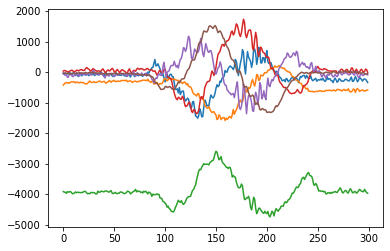

In [17]:
#Encemder(1)
df=pd.read_csv('dataset/Daniel/Encender.csv')
gesto=df[(df.index>=0)&(df.index<300)].astype(int)
gesto = gesto.to_numpy()
plt.plot(gesto[:,2:8])
plt.show()

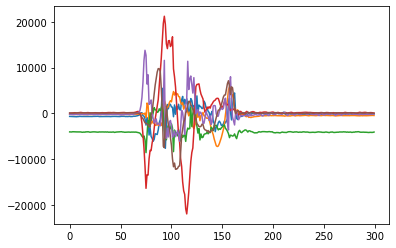

In [27]:
#Complejo(2)
df=pd.read_csv('dataset/Raul/Complejo.csv')
gesto=df[(df.index>=0)&(df.index<300)].astype(int)
cambios=df1[df1['Tiempo']=='Order'].index.tolist()
gesto = gesto.to_numpy()
plt.plot(gesto[:,2:8])
plt.show()

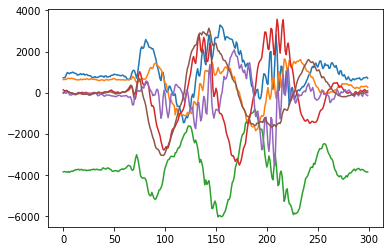

In [28]:
#Complejo(3)
df=pd.read_csv('dataset/Daniel/X.csv')
gesto=df[(df.index>=0)&(df.index<300)].astype(int)
cambios=df1[df1['Tiempo']=='Order'].index.tolist()
gesto = gesto.to_numpy()
plt.plot(gesto[:,2:8])
plt.show()

señal
(300, 6)


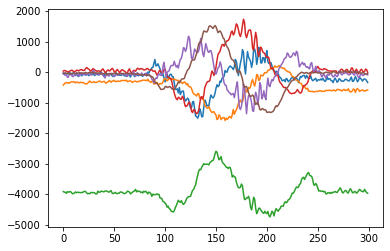

frecuencias
(151, 6)


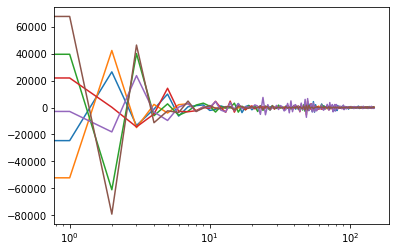

In [42]:
df=pd.read_csv('dataset/Daniel/Encender.csv')
gesto=df[(df.index>=0)&(df.index<300)].astype(int)
gesto = gesto.to_numpy()
plt.plot(gesto[:,2:8])
print('señal')
print(gesto[:,2:8].shape)
plt.show()

m=np.fft.rfft(gesto[:,2:8],axis=0)
plt.plot(np.real(m[1:]))
plt.xscale('log')
print('frecuencias')
print(m.shape)
plt.show()

frecuencias
(151, 6)


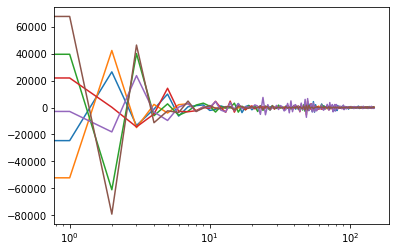

Sigmoid


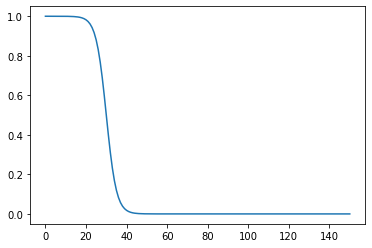

frecuencias * sigmoid
(151, 6)


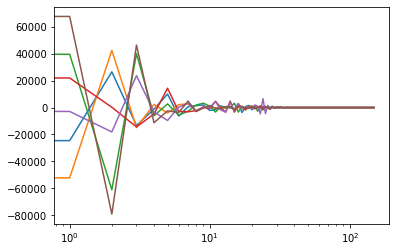

In [53]:
e = np.linspace(12, -48, m.shape[0])
e = (1/(1 + np.exp(-e))).reshape(m.shape[0],1)

plt.plot(np.real(m[1:]))
plt.xscale('log')
print('frecuencias')
print(m.shape)
plt.show()

print('Sigmoid')
plt.plot(e)
plt.show()

plt.plot(np.real((m*e)[1:]))
plt.xscale('log')
print('frecuencias * sigmoid')
print(m.shape)
plt.show()

señal
(300, 6)


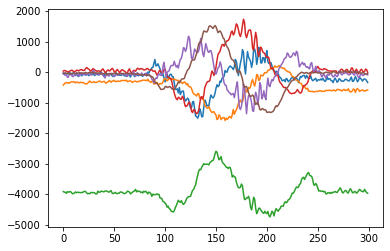

señal filtrada
(300, 6)


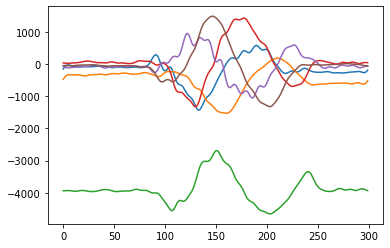

In [54]:
plt.plot(gesto[:,2:8])
print('señal')
print(gesto[:,2:8].shape)
plt.show()

gestoLimpio=np.fft.irfft((m*e),axis=0)
plt.plot(gestoLimpio)
print('señal filtrada')
print(gestoLimpio.shape)
plt.show()